In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
pd.set_option('display.max_columns', None)


### Input the data and set the data columns

In [3]:
# function to load the ts files
def load_ts_data(filepath):
    # Extract ID from filename, e.g., 'als1' from 'als1.ts'
    subject_id = os.path.basename(filepath).split('.')[0]
    
    # Load the data with column names
    columns_ts = [
        "Elapsed Time (sec)", "Left Stride Interval (sec)", "Right Stride Interval (sec)",
        "Left Swing Interval (sec)", "Right Swing Interval (sec)", "Left Swing Interval (% of stride)",
        "Right Swing Interval (% of stride)", "Left Stance Interval (sec)", "Right Stance Interval (sec)",
        "Left Stance Interval (% of stride)", "Right Stance Interval (% of stride)", "Double Support Interval (sec)",
        "Double Support Interval (% of stride)"
    ]
    data = pd.read_csv(filepath, sep='\t', header=None, names=columns_ts)
    
    # Add a 'Subject_ID' column
    data['Subject_ID'] = subject_id
    
    return data

# Example of loading one file
ts_data = load_ts_data('als1.ts')

In [4]:
ts_data

,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride),Subject_ID
0,22.3200,1.2833,1.3533,0.4067,0.4133,31.69,30.54,0.8767,0.9400,68.31,69.46,0.4633,36.10,als1
1,23.6433,1.3233,1.2667,0.4833,0.4000,36.52,31.58,0.8400,0.8667,63.48,68.42,0.4400,33.25,als1
2,24.9467,1.3033,1.3600,0.4500,0.4267,34.53,31.37,0.8533,0.9333,65.47,68.63,0.4267,32.74,als1
3,26.3633,1.4167,1.2833,0.5033,0.3667,35.53,28.57,0.9133,0.9167,64.47,71.43,0.5467,38.59,als1
4,27.6000,1.2367,1.4067,0.3467,0.3567,28.03,25.36,0.8900,1.0500,71.97,74.64,0.5333,43.13,als1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,267.6833,1.3533,1.3200,0.4567,0.3867,33.74,29.29,0.8967,0.9333,66.26,70.71,0.5100,37.68,als1
190,269.0167,1.3333,1.3967,0.4167,0.3833,31.25,27.45,0.9167,1.0133,68.75,72.55,0.5333,40.00,als1
191,270.3000,1.2833,1.3133,0.3733,0.3800,29.09,28.93,0.9100,0.9333,70.91,71.07,0.5300,41.30,als1
192,271.5767,1.2767,1.2867,0.3567,0.3800,27.94,29.53,0.9200,0.9067,72.06,70.47,0.5400,42.30,als1


In [161]:
# read the subject description and change the ID coulmn into the right column name
subject_data = pd.read_csv('subject-description.txt', sep='\t')
subject_data.rename(columns = {'Unnamed: 0':'Subject_ID'}, inplace = True)

In [162]:
subject_data

,Subject_ID,GROUP,AGE(YRS),HEIGHT(meters),Weight(kg),gender,GaitSpeed(m/sec),Duration/Severity
0,control1,control,57.0,1.94,95,f,1.33,0.0
1,control2,control,22.0,1.94,70,m,1.47,0.0
2,control3,control,23.0,1.83,66,f,1.44,0.0
3,control4,control,52.0,1.78,73,f,1.54,0.0
4,control5,control,47.0,1.94,82,f,1.54,0.0
...,...,...,...,...,...,...,...,...
60,als9,subjects,50.0,1.58,61.24,m,0.899,54.0
61,als10,subjects,40.0,1.70,61.24,f,1.219,14.5
62,als11,subjects,39.0,1.88,83.92,m,1.283,7.0
63,als12,subjects,62.0,1.78,117.5,m,0.831,12.0


In [163]:
subject_data.dtypes

Subject_ID            object
GROUP                 object
AGE(YRS)             float64
HEIGHT(meters)       float64
Weight(kg)            object
gender                object
GaitSpeed(m/sec)      object
Duration/Severity    float64
dtype: object

### Deal with NaN values

In [164]:
# Count NaN values in each column
nan_counts = subject_data.isna().sum()

# Count occurrences of the string "MISSING" in each column
missing_counts = subject_data.applymap(lambda x: str(x).upper() == 'MISSING').sum()

# Display the counts
print("NaN counts in each column:\n", nan_counts)
print("\n'MISSING' counts in each column:\n", missing_counts)
print("\n'total nan data' counts in subject description data:\n", missing_counts+nan_counts)

NaN counts in each column:
 Subject_ID           1
GROUP                0
AGE(YRS)             1
HEIGHT(meters)       1
Weight(kg)           1
gender               1
GaitSpeed(m/sec)     1
Duration/Severity    2
dtype: int64

'MISSING' counts in each column:
 Subject_ID           0
GROUP                0
AGE(YRS)             0
HEIGHT(meters)       0
Weight(kg)           1
gender               0
GaitSpeed(m/sec)     3
Duration/Severity    0
dtype: int64

'total nan data' counts in subject description data:
 Subject_ID           1
GROUP                0
AGE(YRS)             1
HEIGHT(meters)       1
Weight(kg)           2
gender               1
GaitSpeed(m/sec)     4
Duration/Severity    2
dtype: int64


In [165]:
# change gender to 1(male) and 0(female)
from sklearn.preprocessing import LabelEncoder

# Assuming 'final_data' is your DataFrame
encoder = LabelEncoder()
subject_data['gender'] = encoder.fit_transform(subject_data['gender'])

In [166]:
from sklearn.impute import KNNImputer
from numpy import sqrt
subject_data.replace('MISSING', np.nan, inplace=True)

# Convert relevant columns to numeric, if necessary
# You might need to convert certain columns explicitly if they were object types
subject_data['AGE(YRS)'] = pd.to_numeric(subject_data['AGE(YRS)'], errors='coerce')
subject_data['HEIGHT(meters)'] = pd.to_numeric(subject_data['HEIGHT(meters)'], errors='coerce')
subject_data['Weight(kg)'] = pd.to_numeric(subject_data['Weight(kg)'], errors='coerce')
subject_data['GaitSpeed(m/sec)'] = pd.to_numeric(subject_data['GaitSpeed(m/sec)'], errors='coerce')
subject_data['Duration/Severity'] = pd.to_numeric(subject_data['Duration/Severity'], errors='coerce')

# find near optimal k for knn with sqrt()
N = len(subject_data)
k = sqrt(N)/2
k

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=int(k))

# Separate the columns to be imputed
columns_to_impute = ['AGE(YRS)', 'HEIGHT(meters)', 'Weight(kg)', 'GaitSpeed(m/sec)', 'Duration/Severity', 'gender']
numeric_data = subject_data[columns_to_impute]


# Apply the imputer to fill NaN values
imputed_data = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Reassign the imputed values back to the original DataFrame
subject_data[columns_to_impute] = imputed_data

# Display the imputed data
subject_data.head(5)

,Subject_ID,GROUP,AGE(YRS),HEIGHT(meters),Weight(kg),gender,GaitSpeed(m/sec),Duration/Severity
0,control1,control,57.0,1.94,95.0,0.0,1.33,0.0
1,control2,control,22.0,1.94,70.0,1.0,1.47,0.0
2,control3,control,23.0,1.83,66.0,0.0,1.44,0.0
3,control4,control,52.0,1.78,73.0,0.0,1.54,0.0
4,control5,control,47.0,1.94,82.0,0.0,1.54,0.0


In [167]:
subject_data[subject_data['Subject_ID'].isna()]

,Subject_ID,GROUP,AGE(YRS),HEIGHT(meters),Weight(kg),gender,GaitSpeed(m/sec),Duration/Severity
36,NaN,9,64.0,1.945,80.0,2.0,1.3125,2.125


In [168]:
len(subject_data)

65

In [169]:
subject_data = subject_data.dropna(subset=['Subject_ID'])

### Test the merge for subject-description.txt and .ts file

In [170]:
# Test for merge the data on 'Subject_ID'
merged_data = pd.merge(subject_data, ts_data, on='Subject_ID')

In [159]:
merged_data

,Subject_ID,GROUP,AGE(YRS),HEIGHT(meters),Weight(kg),gender,GaitSpeed(m/sec),Duration/Severity,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride)
0,als1,subjects,68.0,1.803,86.18,1.0,1.302,1.0,22.3200,1.2833,1.3533,0.4067,0.4133,31.69,30.54,0.8767,0.9400,68.31,69.46,0.4633,36.10
1,als1,subjects,68.0,1.803,86.18,1.0,1.302,1.0,23.6433,1.3233,1.2667,0.4833,0.4000,36.52,31.58,0.8400,0.8667,63.48,68.42,0.4400,33.25
2,als1,subjects,68.0,1.803,86.18,1.0,1.302,1.0,24.9467,1.3033,1.3600,0.4500,0.4267,34.53,31.37,0.8533,0.9333,65.47,68.63,0.4267,32.74
3,als1,subjects,68.0,1.803,86.18,1.0,1.302,1.0,26.3633,1.4167,1.2833,0.5033,0.3667,35.53,28.57,0.9133,0.9167,64.47,71.43,0.5467,38.59
4,als1,subjects,68.0,1.803,86.18,1.0,1.302,1.0,27.6000,1.2367,1.4067,0.3467,0.3567,28.03,25.36,0.8900,1.0500,71.97,74.64,0.5333,43.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,als1,subjects,68.0,1.803,86.18,1.0,1.302,1.0,267.6833,1.3533,1.3200,0.4567,0.3867,33.74,29.29,0.8967,0.9333,66.26,70.71,0.5100,37.68
190,als1,subjects,68.0,1.803,86.18,1.0,1.302,1.0,269.0167,1.3333,1.3967,0.4167,0.3833,31.25,27.45,0.9167,1.0133,68.75,72.55,0.5333,40.00
191,als1,subjects,68.0,1.803,86.18,1.0,1.302,1.0,270.3000,1.2833,1.3133,0.3733,0.3800,29.09,28.93,0.9100,0.9333,70.91,71.07,0.5300,41.30
192,als1,subjects,68.0,1.803,86.18,1.0,1.302,1.0,271.5767,1.2767,1.2867,0.3567,0.3800,27.94,29.53,0.9200,0.9067,72.06,70.47,0.5400,42.30


In [171]:
merged_data.Subject_ID.value_counts()

Subject_ID
als1    194
Name: count, dtype: int64

65

### Merge whole .ts files to subject-description.txt

In [172]:
# function for merge whole .ts files
def load_and_merge_ts_data(subject_data, filepath):
    # Extract ID from filename, e.g., 'als1' from 'als1.ts'
    subject_id = os.path.basename(filepath).split('.')[0]
    
    # Load the time series data
    columns_ts = [
        "Elapsed Time (sec)", "Left Stride Interval (sec)", "Right Stride Interval (sec)",
        "Left Swing Interval (sec)", "Right Swing Interval (sec)", "Left Swing Interval (% of stride)",
        "Right Swing Interval (% of stride)", "Left Stance Interval (sec)", "Right Stance Interval (sec)",
        "Left Stance Interval (% of stride)", "Right Stance Interval (% of stride)", "Double Support Interval (sec)",
        "Double Support Interval (% of stride)"
    ]
    data = pd.read_csv(filepath, sep='\t', header=None, names=columns_ts)
    data['Subject_ID'] = subject_id
    
    # Merge with subject metadata
    merged_data = pd.merge(subject_data, data, on='Subject_ID')
    return merged_data

In [173]:
# Directory containing all .ts files
directory_path = 'F:/bio_HW/final project in python'

# List to hold data from all files
all_data = []

# Process each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.ts'):
        filepath = os.path.join(directory_path, filename)
        merged_data = load_and_merge_ts_data(subject_data, filepath)
        all_data.append(merged_data)

# Combine all data into one DataFrame
final_data = pd.concat(all_data, ignore_index=True)

In [174]:
final_data

,Subject_ID,GROUP,AGE(YRS),HEIGHT(meters),Weight(kg),gender,GaitSpeed(m/sec),Duration/Severity,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride)
0,als1,subjects,68.0,1.803,86.18,1.0,1.302,1.0,22.3200,1.2833,1.3533,0.4067,0.4133,31.69,30.54,0.8767,0.9400,68.31,69.46,0.4633,36.10
1,als1,subjects,68.0,1.803,86.18,1.0,1.302,1.0,23.6433,1.3233,1.2667,0.4833,0.4000,36.52,31.58,0.8400,0.8667,63.48,68.42,0.4400,33.25
2,als1,subjects,68.0,1.803,86.18,1.0,1.302,1.0,24.9467,1.3033,1.3600,0.4500,0.4267,34.53,31.37,0.8533,0.9333,65.47,68.63,0.4267,32.74
3,als1,subjects,68.0,1.803,86.18,1.0,1.302,1.0,26.3633,1.4167,1.2833,0.5033,0.3667,35.53,28.57,0.9133,0.9167,64.47,71.43,0.5467,38.59
4,als1,subjects,68.0,1.803,86.18,1.0,1.302,1.0,27.6000,1.2367,1.4067,0.3467,0.3567,28.03,25.36,0.8900,1.0500,71.97,74.64,0.5333,43.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15155,park9,park,68.0,1.920,84.00,1.0,1.050,1.5,294.2700,1.2467,1.2400,0.4600,0.4500,36.90,36.29,0.7867,0.7900,63.10,63.71,0.3367,27.01
15156,park9,park,68.0,1.920,84.00,1.0,1.050,1.5,295.4800,1.2100,1.2267,0.4533,0.4300,37.47,35.05,0.7567,0.7967,62.53,64.95,0.3267,27.00
15157,park9,park,68.0,1.920,84.00,1.0,1.050,1.5,296.6933,1.2133,1.2067,0.4533,0.4333,37.36,35.91,0.7600,0.7733,62.64,64.09,0.3267,26.92
15158,park9,park,68.0,1.920,84.00,1.0,1.050,1.5,297.9233,1.2300,1.2233,0.4600,0.4333,37.40,35.42,0.7700,0.7900,62.60,64.58,0.3367,27.37


In [175]:
final_data.isna().sum()

Subject_ID                               0
GROUP                                    0
AGE(YRS)                                 0
HEIGHT(meters)                           0
Weight(kg)                               0
gender                                   0
GaitSpeed(m/sec)                         0
Duration/Severity                        0
Elapsed Time (sec)                       0
Left Stride Interval (sec)               0
Right Stride Interval (sec)              0
Left Swing Interval (sec)                0
Right Swing Interval (sec)               0
Left Swing Interval (% of stride)        0
Right Swing Interval (% of stride)       0
Left Stance Interval (sec)               0
Right Stance Interval (sec)              0
Left Stance Interval (% of stride)       0
Right Stance Interval (% of stride)      0
Double Support Interval (sec)            0
Double Support Interval (% of stride)    0
dtype: int64

In [13]:
# check als1 contain the same information with test above
final_data[final_data['Subject_ID']=='als1']

,Subject_ID,GROUP,AGE(YRS),HEIGHT(meters),Weight(kg),gender,GaitSpeed(m/sec),Duration/Severity,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride)
0,als1,subjects,68.0,1.803,86.18,m,1.302,1.0,22.3200,1.2833,1.3533,0.4067,0.4133,31.69,30.54,0.8767,0.9400,68.31,69.46,0.4633,36.10
1,als1,subjects,68.0,1.803,86.18,m,1.302,1.0,23.6433,1.3233,1.2667,0.4833,0.4000,36.52,31.58,0.8400,0.8667,63.48,68.42,0.4400,33.25
2,als1,subjects,68.0,1.803,86.18,m,1.302,1.0,24.9467,1.3033,1.3600,0.4500,0.4267,34.53,31.37,0.8533,0.9333,65.47,68.63,0.4267,32.74
3,als1,subjects,68.0,1.803,86.18,m,1.302,1.0,26.3633,1.4167,1.2833,0.5033,0.3667,35.53,28.57,0.9133,0.9167,64.47,71.43,0.5467,38.59
4,als1,subjects,68.0,1.803,86.18,m,1.302,1.0,27.6000,1.2367,1.4067,0.3467,0.3567,28.03,25.36,0.8900,1.0500,71.97,74.64,0.5333,43.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,als1,subjects,68.0,1.803,86.18,m,1.302,1.0,267.6833,1.3533,1.3200,0.4567,0.3867,33.74,29.29,0.8967,0.9333,66.26,70.71,0.5100,37.68
190,als1,subjects,68.0,1.803,86.18,m,1.302,1.0,269.0167,1.3333,1.3967,0.4167,0.3833,31.25,27.45,0.9167,1.0133,68.75,72.55,0.5333,40.00
191,als1,subjects,68.0,1.803,86.18,m,1.302,1.0,270.3000,1.2833,1.3133,0.3733,0.3800,29.09,28.93,0.9100,0.9333,70.91,71.07,0.5300,41.30
192,als1,subjects,68.0,1.803,86.18,m,1.302,1.0,271.5767,1.2767,1.2867,0.3567,0.3800,27.94,29.53,0.9200,0.9067,72.06,70.47,0.5400,42.30


In [176]:
# Save the merged data to a CSV file (optional)
final_data.to_csv('merged_time_series_data.csv', index=False)

### Prediction model implementation

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [16]:
# replace the nan data "MISSING" to defult value
# final_data.replace('MISSING', np.nan, inplace=True)

In [17]:
# change gender to 1(male) and 0(female)
#from sklearn.preprocessing import LabelEncoder

# Assuming 'final_data' is your DataFrame
#encoder = LabelEncoder()
#final_data['gender'] = encoder.fit_transform(final_data['gender'])

In [18]:
final_data

,Subject_ID,GROUP,AGE(YRS),HEIGHT(meters),Weight(kg),gender,GaitSpeed(m/sec),Duration/Severity,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride)
0,als1,subjects,68.0,1.803,86.18,1,1.302,1.0,22.3200,1.2833,1.3533,0.4067,0.4133,31.69,30.54,0.8767,0.9400,68.31,69.46,0.4633,36.10
1,als1,subjects,68.0,1.803,86.18,1,1.302,1.0,23.6433,1.3233,1.2667,0.4833,0.4000,36.52,31.58,0.8400,0.8667,63.48,68.42,0.4400,33.25
2,als1,subjects,68.0,1.803,86.18,1,1.302,1.0,24.9467,1.3033,1.3600,0.4500,0.4267,34.53,31.37,0.8533,0.9333,65.47,68.63,0.4267,32.74
3,als1,subjects,68.0,1.803,86.18,1,1.302,1.0,26.3633,1.4167,1.2833,0.5033,0.3667,35.53,28.57,0.9133,0.9167,64.47,71.43,0.5467,38.59
4,als1,subjects,68.0,1.803,86.18,1,1.302,1.0,27.6000,1.2367,1.4067,0.3467,0.3567,28.03,25.36,0.8900,1.0500,71.97,74.64,0.5333,43.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15155,park9,park,68.0,1.920,84,1,1.05,1.5,294.2700,1.2467,1.2400,0.4600,0.4500,36.90,36.29,0.7867,0.7900,63.10,63.71,0.3367,27.01
15156,park9,park,68.0,1.920,84,1,1.05,1.5,295.4800,1.2100,1.2267,0.4533,0.4300,37.47,35.05,0.7567,0.7967,62.53,64.95,0.3267,27.00
15157,park9,park,68.0,1.920,84,1,1.05,1.5,296.6933,1.2133,1.2067,0.4533,0.4333,37.36,35.91,0.7600,0.7733,62.64,64.09,0.3267,26.92
15158,park9,park,68.0,1.920,84,1,1.05,1.5,297.9233,1.2300,1.2233,0.4600,0.4333,37.40,35.42,0.7700,0.7900,62.60,64.58,0.3367,27.37


### Test with model implementation with RF with final data(not yet combining the time series data with ID)

In [19]:

# not using ID and selecting features in X and y as target
# X = final_data.drop(['Subject_ID', 'GROUP'], axis=1).iloc[:, 6:19]  
X = final_data.drop(['Subject_ID', 'GROUP'], axis=1).iloc[:, [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]  
y = final_data['GROUP']  # This is now your target variable


# Handle missing values with median value (will using knn imputer for last version)
X.fillna(X.median(), inplace=True)

# Optional, scale the data if necessary
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# test spliter for original data which not yet grouping with ID
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [20]:
X

,AGE(YRS),HEIGHT(meters),Weight(kg),gender,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride)
0,68.0,1.803,86.18,1,22.3200,1.2833,1.3533,0.4067,0.4133,31.69,30.54,0.8767,0.9400,68.31,69.46
1,68.0,1.803,86.18,1,23.6433,1.3233,1.2667,0.4833,0.4000,36.52,31.58,0.8400,0.8667,63.48,68.42
2,68.0,1.803,86.18,1,24.9467,1.3033,1.3600,0.4500,0.4267,34.53,31.37,0.8533,0.9333,65.47,68.63
3,68.0,1.803,86.18,1,26.3633,1.4167,1.2833,0.5033,0.3667,35.53,28.57,0.9133,0.9167,64.47,71.43
4,68.0,1.803,86.18,1,27.6000,1.2367,1.4067,0.3467,0.3567,28.03,25.36,0.8900,1.0500,71.97,74.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15155,68.0,1.920,84,1,294.2700,1.2467,1.2400,0.4600,0.4500,36.90,36.29,0.7867,0.7900,63.10,63.71
15156,68.0,1.920,84,1,295.4800,1.2100,1.2267,0.4533,0.4300,37.47,35.05,0.7567,0.7967,62.53,64.95
15157,68.0,1.920,84,1,296.6933,1.2133,1.2067,0.4533,0.4333,37.36,35.91,0.7600,0.7733,62.64,64.09
15158,68.0,1.920,84,1,297.9233,1.2300,1.2233,0.4600,0.4333,37.40,35.42,0.7700,0.7900,62.60,64.58


### A test for original combined data

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [22]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9953825857519789
              precision    recall  f1-score   support

     control       1.00      0.99      0.99      1633
        hunt       0.99      1.00      0.99      1979
        park       1.00      0.99      1.00      1448
    subjects       1.00      1.00      1.00      1004

    accuracy                           1.00      6064
   macro avg       1.00      1.00      1.00      6064
weighted avg       1.00      1.00      1.00      6064



### Real implementation for prediction models with combined time series data

### Merge the .ts data into unique ID

In [177]:
# Group the data by 'Subject_ID' and calculate summary statistics
features = final_data.groupby('Subject_ID').agg({
    'AGE(YRS)': 'first','HEIGHT(meters)': 'first','Weight(kg)': 'first','gender': 'first','GaitSpeed(m/sec)': 'first','Duration/Severity': 'max',
    'Elapsed Time (sec)': ['mean', 'std', 'min', 'max'],
    'Left Stride Interval (sec)': ['mean', 'std', 'min', 'max'],
    'Right Stride Interval (sec)': ['mean', 'std', 'min', 'max'],
    'Left Swing Interval (sec)': ['mean', 'std', 'min', 'max'],
    'Right Swing Interval (sec)': ['mean', 'std', 'min', 'max'],
    'Left Stance Interval (sec)': ['mean', 'std', 'min', 'max'],
    'Right Stance Interval (sec)': ['mean', 'std', 'min', 'max'],
    'Double Support Interval (sec)': ['mean', 'std', 'min', 'max'],
    
    'Left Swing Interval (% of stride)': ['mean', 'std', 'min', 'max'],
    'Right Swing Interval (% of stride)': ['mean', 'std', 'min', 'max'],
    'Left Stance Interval (% of stride)': ['mean', 'std', 'min', 'max'],
    'Right Stance Interval (% of stride)': ['mean', 'std', 'min', 'max'],
    'Double Support Interval (% of stride)': ['mean', 'std', 'min', 'max']
}).reset_index()

# Flatten the MultiIndex in columns created by agg
features.columns = ['_'.join(col).strip() for col in features.columns.values]

In [24]:
# gender to 1(male) and 0(female) for feature dataset (optional, if changed before, no need to run this codes)
#from sklearn.preprocessing import LabelEncoder

#encoder = LabelEncoder()
#features['gender_first'] = encoder.fit_transform(features['gender_first'])

In [178]:
features.rename(columns={'Subject_ID_':'Subject_ID'}, inplace = True)

In [179]:
features

,Subject_ID,AGE(YRS)_first,HEIGHT(meters)_first,Weight(kg)_first,gender_first,GaitSpeed(m/sec)_first,Duration/Severity_max,Elapsed Time (sec)_mean,Elapsed Time (sec)_std,Elapsed Time (sec)_min,Elapsed Time (sec)_max,Left Stride Interval (sec)_mean,Left Stride Interval (sec)_std,Left Stride Interval (sec)_min,Left Stride Interval (sec)_max,Right Stride Interval (sec)_mean,Right Stride Interval (sec)_std,Right Stride Interval (sec)_min,Right Stride Interval (sec)_max,Left Swing Interval (sec)_mean,Left Swing Interval (sec)_std,Left Swing Interval (sec)_min,Left Swing Interval (sec)_max,Right Swing Interval (sec)_mean,Right Swing Interval (sec)_std,Right Swing Interval (sec)_min,Right Swing Interval (sec)_max,Left Stance Interval (sec)_mean,Left Stance Interval (sec)_std,Left Stance Interval (sec)_min,Left Stance Interval (sec)_max,Right Stance Interval (sec)_mean,Right Stance Interval (sec)_std,Right Stance Interval (sec)_min,Right Stance Interval (sec)_max,Double Support Interval (sec)_mean,Double Support Interval (sec)_std,Double Support Interval (sec)_min,Double Support Interval (sec)_max,Left Swing Interval (% of stride)_mean,Left Swing Interval (% of stride)_std,Left Swing Interval (% of stride)_min,Left Swing Interval (% of stride)_max,Right Swing Interval (% of stride)_mean,Right Swing Interval (% of stride)_std,Right Swing Interval (% of stride)_min,Right Swing Interval (% of stride)_max,Left Stance Interval (% of stride)_mean,Left Stance Interval (% of stride)_std,Left Stance Interval (% of stride)_min,Left Stance Interval (% of stride)_max,Right Stance Interval (% of stride)_mean,Right Stance Interval (% of stride)_std,Right Stance Interval (% of stride)_min,Right Stance Interval (% of stride)_max,Double Support Interval (% of stride)_mean,Double Support Interval (% of stride)_std,Double Support Interval (% of stride)_min,Double Support Interval (% of stride)_max
0,als1,68.0,1.803,86.1800,1.0,1.302,1.0,147.958469,72.986580,22.3200,272.9567,1.298559,0.334210,1.1167,5.6667,1.298537,0.336559,1.0967,5.7767,0.425860,0.050338,0.1900,0.7000,0.391337,0.038291,0.1333,0.6767,0.872697,0.332522,0.5433,5.2600,0.907201,0.316666,0.7533,5.1000,0.481356,0.309871,0.3233,4.5833,33.322062,3.806154,7.18,56.30,30.585361,3.005942,8.49,37.57,66.677938,3.806154,43.70,92.82,69.414639,3.005942,62.43,91.51,36.108711,5.006053,28.96,80.88
1,als10,40.0,1.700,61.2400,0.0,1.219,14.5,160.533365,80.740583,21.7800,299.5600,1.133741,0.034332,1.0700,1.3167,1.133673,0.032930,1.0700,1.3300,0.368307,0.013425,0.3233,0.4033,0.369240,0.018730,0.3233,0.4767,0.765432,0.031849,0.7100,0.9300,0.764428,0.024035,0.7133,0.8933,0.396191,0.022624,0.3300,0.4900,32.500366,1.190953,27.34,35.48,32.564553,1.189318,28.53,37.25,67.499634,1.190953,64.52,72.66,67.435447,1.189318,62.75,71.47,34.934593,1.423995,29.73,40.06
2,als11,39.0,1.880,83.9200,1.0,1.283,7.0,160.473655,80.764538,22.1933,299.3033,1.215034,0.061976,1.0467,1.7633,1.215050,0.056668,1.0367,1.5533,0.396900,0.024103,0.1567,0.5167,0.411180,0.018578,0.2733,0.4600,0.818136,0.051305,0.7467,1.2600,0.803876,0.052680,0.7433,1.1067,0.406959,0.055895,0.3467,0.8267,32.682183,1.706387,14.97,35.03,33.879651,1.632355,23.83,35.69,67.317817,1.706387,64.97,85.03,66.120349,1.632355,64.31,76.17,33.403581,2.879813,30.06,53.18
3,als12,62.0,1.780,117.5000,1.0,0.831,12.0,130.556828,75.319169,22.2167,299.2567,2.281637,5.815653,1.2600,55.1500,2.327648,5.947309,1.2200,53.3267,0.666611,2.122176,0.1167,23.8967,0.676504,2.505307,0.3167,28.1133,1.615032,5.389055,0.8300,54.8400,1.651150,5.326724,0.8233,52.7400,0.993768,3.332034,0.3867,26.7267,33.340574,8.058147,0.56,92.17,31.468443,7.350630,1.10,90.86,66.659426,8.058147,7.83,99.44,68.531557,7.350630,9.14,98.90,37.119180,18.538687,18.73,218.57
4,als13,66.0,1.830,75.3025,1.0,0.832,34.0,159.377849,80.870695,22.8500,299.5667,1.520109,0.092713,1.3867,2.1200,1.520201,0.095548,1.2567,2.1100,0.477576,0.046893,0.2367,0.6200,0.496978,0.048578,0.2167,0.7067,1.042534,0.092297,0.9200,1.8833,1.023223,0.078638,0

In [180]:
# 'group_data' contains unique 'Subject_ID' with their corresponding 'GROUP'
group_data = final_data[['Subject_ID', 'GROUP']].drop_duplicates('Subject_ID')
features = features.merge(group_data, left_on='Subject_ID', right_on='Subject_ID')

In [28]:
features

,Subject_ID,AGE(YRS)_first,HEIGHT(meters)_first,Weight(kg)_first,gender_first,GaitSpeed(m/sec)_first,Duration/Severity_max,Elapsed Time (sec)_mean,Elapsed Time (sec)_std,Elapsed Time (sec)_min,Elapsed Time (sec)_max,Left Stride Interval (sec)_mean,Left Stride Interval (sec)_std,Left Stride Interval (sec)_min,Left Stride Interval (sec)_max,Right Stride Interval (sec)_mean,Right Stride Interval (sec)_std,Right Stride Interval (sec)_min,Right Stride Interval (sec)_max,Left Swing Interval (sec)_mean,Left Swing Interval (sec)_std,Left Swing Interval (sec)_min,Left Swing Interval (sec)_max,Right Swing Interval (sec)_mean,Right Swing Interval (sec)_std,Right Swing Interval (sec)_min,Right Swing Interval (sec)_max,Left Stance Interval (sec)_mean,Left Stance Interval (sec)_std,Left Stance Interval (sec)_min,Left Stance Interval (sec)_max,Right Stance Interval (sec)_mean,Right Stance Interval (sec)_std,Right Stance Interval (sec)_min,Right Stance Interval (sec)_max,Double Support Interval (sec)_mean,Double Support Interval (sec)_std,Double Support Interval (sec)_min,Double Support Interval (sec)_max,Left Swing Interval (% of stride)_mean,Left Swing Interval (% of stride)_std,Left Swing Interval (% of stride)_min,Left Swing Interval (% of stride)_max,Right Swing Interval (% of stride)_mean,Right Swing Interval (% of stride)_std,Right Swing Interval (% of stride)_min,Right Swing Interval (% of stride)_max,Left Stance Interval (% of stride)_mean,Left Stance Interval (% of stride)_std,Left Stance Interval (% of stride)_min,Left Stance Interval (% of stride)_max,Right Stance Interval (% of stride)_mean,Right Stance Interval (% of stride)_std,Right Stance Interval (% of stride)_min,Right Stance Interval (% of stride)_max,Double Support Interval (% of stride)_mean,Double Support Interval (% of stride)_std,Double Support Interval (% of stride)_min,Double Support Interval (% of stride)_max,GROUP
0,als1,68.0,1.803,86.18,1,1.302,1.0,147.958469,72.986580,22.3200,272.9567,1.298559,0.334210,1.1167,5.6667,1.298537,0.336559,1.0967,5.7767,0.425860,0.050338,0.1900,0.7000,0.391337,0.038291,0.1333,0.6767,0.872697,0.332522,0.5433,5.2600,0.907201,0.316666,0.7533,5.1000,0.481356,0.309871,0.3233,4.5833,33.322062,3.806154,7.18,56.30,30.585361,3.005942,8.49,37.57,66.677938,3.806154,43.70,92.82,69.414639,3.005942,62.43,91.51,36.108711,5.006053,28.96,80.88,subjects
1,als10,40.0,1.700,61.24,0,1.219,14.5,160.533365,80.740583,21.7800,299.5600,1.133741,0.034332,1.0700,1.3167,1.133673,0.032930,1.0700,1.3300,0.368307,0.013425,0.3233,0.4033,0.369240,0.018730,0.3233,0.4767,0.765432,0.031849,0.7100,0.9300,0.764428,0.024035,0.7133,0.8933,0.396191,0.022624,0.3300,0.4900,32.500366,1.190953,27.34,35.48,32.564553,1.189318,28.53,37.25,67.499634,1.190953,64.52,72.66,67.435447,1.189318,62.75,71.47,34.934593,1.423995,29.73,40.06,subjects
2,als11,39.0,1.880,83.92,1,1.283,7.0,160.473655,80.764538,22.1933,299.3033,1.215034,0.061976,1.0467,1.7633,1.215050,0.056668,1.0367,1.5533,0.396900,0.024103,0.1567,0.5167,0.411180,0.018578,0.2733,0.4600,0.818136,0.051305,0.7467,1.2600,0.803876,0.052680,0.7433,1.1067,0.406959,0.055895,0.3467,0.8267,32.682183,1.706387,14.97,35.03,33.879651,1.632355,23.83,35.69,67.317817,1.706387,64.97,85.03,66.120349,1.632355,64.31,76.17,33.403581,2.879813,30.06,53.18,subjects
3,als12,62.0,1.780,117.5,1,0.831,12.0,130.556828,75.319169,22.2167,299.2567,2.281637,5.815653,1.2600,55.1500,2.327648,5.947309,1.2200,53.3267,0.666611,2.122176,0.1167,23.8967,0.676504,2.505307,0.3167,28.1133,1.615032,5.389055,0.8300,54.8400,1.651150,5.326724,0.8233,52.7400,0.993768,3.332034,0.3867,26.7267,33.340574,8.058147,0.56,92.17,31.468443,7.350630,1.10,90.86,66.659426,8.058147,7.83,99.44,68.531557,7.350630,9.14,98.90,37.119180,18.538687,18.73,218.57,subjects
4,als13,66.0,1.830,None,1,0.832,34.0,159.377849,80.870695,22.8500,299.5667,1.520109,0.092713,1.3867,2.1200,1.520201,0.095548,1.2567,2.1100,0.477576,0.046893,0.2367,0.6200,0.496978,0.048578,0.2167,0.7067,1.042534,0.092297,0.9200,1.8833

### Split the merged data

In [28]:
X = features.drop(['Subject_ID', 'GROUP' ,'AGE(YRS)_first','HEIGHT(meters)_first','Weight(kg)_first','gender_first','GaitSpeed(m/sec)_first','Duration/Severity_max'], axis=1)
# X.fillna(X.median(), inplace=True)
y = features['GROUP']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X.isna().sum()

### RF model with original GROUP

In [ ]:
# RF model with original GROUP labels
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

### SVM with with original GROUP

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Define the model
svm_model = SVC(probability=True)  # Set probability to True if you need probability estimates

# Set up the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['rbf', 'poly', 'sigmoid']  # Type of the kernel
}

# Set up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

In [33]:
# Best model
best_svm = grid_search.best_estimator_

# Predictions
y_pred = best_svm.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.4
              precision    recall  f1-score   support

     control       0.67      0.50      0.57         4
        hunt       0.27      1.00      0.42         4
        park       1.00      0.17      0.29         6
    subjects       1.00      0.17      0.29         6

    accuracy                           0.40        20
   macro avg       0.73      0.46      0.39        20
weighted avg       0.79      0.40      0.37        20



### Prediction models with case control GROUP label

In [181]:
# Map existing GROUP labels to 'healthy' or 'case'
group_mapping = {
    'control': 'control',
    'subjects': 'case',
    'als': 'case',
    'hunt': 'case',
    'park': 'case'
}
final_data['GROUP'] = final_data['GROUP'].map(group_mapping)

In [182]:
# Group the data by 'Subject_ID' and calculate summary statistics
features = final_data.groupby('Subject_ID').agg({
    'AGE(YRS)': 'first','HEIGHT(meters)': 'first','Weight(kg)': 'first','gender': 'first','GaitSpeed(m/sec)': 'first','Duration/Severity': 'max',
    'Elapsed Time (sec)': ['mean', 'std', 'min', 'max'],
    'Left Stride Interval (sec)': ['mean', 'std', 'min', 'max'],
    'Right Stride Interval (sec)': ['mean', 'std', 'min', 'max'],
    'Left Swing Interval (sec)': ['mean', 'std', 'min', 'max'],
    'Right Swing Interval (sec)': ['mean', 'std', 'min', 'max'],
    'Left Stance Interval (sec)': ['mean', 'std', 'min', 'max'],
    'Right Stance Interval (sec)': ['mean', 'std', 'min', 'max'],
    'Double Support Interval (sec)': ['mean', 'std', 'min', 'max'],
    
    'Left Swing Interval (% of stride)': ['mean', 'std', 'min', 'max'],
    'Right Swing Interval (% of stride)': ['mean', 'std', 'min', 'max'],
    'Left Stance Interval (% of stride)': ['mean', 'std', 'min', 'max'],
    'Right Stance Interval (% of stride)': ['mean', 'std', 'min', 'max'],
    'Double Support Interval (% of stride)': ['mean', 'std', 'min', 'max']
}).reset_index()

# Flatten the MultiIndex in columns created by agg
features.columns = ['_'.join(col).strip() for col in features.columns.values]

In [31]:
features.columns

Index(['Subject_ID_', 'AGE(YRS)_first', 'HEIGHT(meters)_first',
       'Weight(kg)_first', 'gender_first', 'GaitSpeed(m/sec)_first',
       'Duration/Severity_max', 'Elapsed Time (sec)_mean',
       'Elapsed Time (sec)_std', 'Elapsed Time (sec)_min',
       'Elapsed Time (sec)_max', 'Left Stride Interval (sec)_mean',
       'Left Stride Interval (sec)_std', 'Left Stride Interval (sec)_min',
       'Left Stride Interval (sec)_max', 'Right Stride Interval (sec)_mean',
       'Right Stride Interval (sec)_std', 'Right Stride Interval (sec)_min',
       'Right Stride Interval (sec)_max', 'Left Swing Interval (sec)_mean',
       'Left Swing Interval (sec)_std', 'Left Swing Interval (sec)_min',
       'Left Swing Interval (sec)_max', 'Right Swing Interval (sec)_mean',
       'Right Swing Interval (sec)_std', 'Right Swing Interval (sec)_min',
       'Right Swing Interval (sec)_max', 'Left Stance Interval (sec)_mean',
       'Left Stance Interval (sec)_std', 'Left Stance Interval (sec)_min',
  

In [183]:
# Merge the new GROUP labels
group_data = final_data[['Subject_ID', 'GROUP']].drop_duplicates('Subject_ID')
features = features.merge(group_data, left_on='Subject_ID_', right_on='Subject_ID')

In [184]:
features

,Subject_ID_,AGE(YRS)_first,HEIGHT(meters)_first,Weight(kg)_first,gender_first,GaitSpeed(m/sec)_first,Duration/Severity_max,Elapsed Time (sec)_mean,Elapsed Time (sec)_std,Elapsed Time (sec)_min,Elapsed Time (sec)_max,Left Stride Interval (sec)_mean,Left Stride Interval (sec)_std,Left Stride Interval (sec)_min,Left Stride Interval (sec)_max,Right Stride Interval (sec)_mean,Right Stride Interval (sec)_std,Right Stride Interval (sec)_min,Right Stride Interval (sec)_max,Left Swing Interval (sec)_mean,Left Swing Interval (sec)_std,Left Swing Interval (sec)_min,Left Swing Interval (sec)_max,Right Swing Interval (sec)_mean,Right Swing Interval (sec)_std,Right Swing Interval (sec)_min,Right Swing Interval (sec)_max,Left Stance Interval (sec)_mean,Left Stance Interval (sec)_std,Left Stance Interval (sec)_min,Left Stance Interval (sec)_max,Right Stance Interval (sec)_mean,Right Stance Interval (sec)_std,Right Stance Interval (sec)_min,Right Stance Interval (sec)_max,Double Support Interval (sec)_mean,Double Support Interval (sec)_std,Double Support Interval (sec)_min,Double Support Interval (sec)_max,Left Swing Interval (% of stride)_mean,Left Swing Interval (% of stride)_std,Left Swing Interval (% of stride)_min,Left Swing Interval (% of stride)_max,Right Swing Interval (% of stride)_mean,Right Swing Interval (% of stride)_std,Right Swing Interval (% of stride)_min,Right Swing Interval (% of stride)_max,Left Stance Interval (% of stride)_mean,Left Stance Interval (% of stride)_std,Left Stance Interval (% of stride)_min,Left Stance Interval (% of stride)_max,Right Stance Interval (% of stride)_mean,Right Stance Interval (% of stride)_std,Right Stance Interval (% of stride)_min,Right Stance Interval (% of stride)_max,Double Support Interval (% of stride)_mean,Double Support Interval (% of stride)_std,Double Support Interval (% of stride)_min,Double Support Interval (% of stride)_max,Subject_ID,GROUP
0,als1,68.0,1.803,86.1800,1.0,1.302,1.0,147.958469,72.986580,22.3200,272.9567,1.298559,0.334210,1.1167,5.6667,1.298537,0.336559,1.0967,5.7767,0.425860,0.050338,0.1900,0.7000,0.391337,0.038291,0.1333,0.6767,0.872697,0.332522,0.5433,5.2600,0.907201,0.316666,0.7533,5.1000,0.481356,0.309871,0.3233,4.5833,33.322062,3.806154,7.18,56.30,30.585361,3.005942,8.49,37.57,66.677938,3.806154,43.70,92.82,69.414639,3.005942,62.43,91.51,36.108711,5.006053,28.96,80.88,als1,case
1,als10,40.0,1.700,61.2400,0.0,1.219,14.5,160.533365,80.740583,21.7800,299.5600,1.133741,0.034332,1.0700,1.3167,1.133673,0.032930,1.0700,1.3300,0.368307,0.013425,0.3233,0.4033,0.369240,0.018730,0.3233,0.4767,0.765432,0.031849,0.7100,0.9300,0.764428,0.024035,0.7133,0.8933,0.396191,0.022624,0.3300,0.4900,32.500366,1.190953,27.34,35.48,32.564553,1.189318,28.53,37.25,67.499634,1.190953,64.52,72.66,67.435447,1.189318,62.75,71.47,34.934593,1.423995,29.73,40.06,als10,case
2,als11,39.0,1.880,83.9200,1.0,1.283,7.0,160.473655,80.764538,22.1933,299.3033,1.215034,0.061976,1.0467,1.7633,1.215050,0.056668,1.0367,1.5533,0.396900,0.024103,0.1567,0.5167,0.411180,0.018578,0.2733,0.4600,0.818136,0.051305,0.7467,1.2600,0.803876,0.052680,0.7433,1.1067,0.406959,0.055895,0.3467,0.8267,32.682183,1.706387,14.97,35.03,33.879651,1.632355,23.83,35.69,67.317817,1.706387,64.97,85.03,66.120349,1.632355,64.31,76.17,33.403581,2.879813,30.06,53.18,als11,case
3,als12,62.0,1.780,117.5000,1.0,0.831,12.0,130.556828,75.319169,22.2167,299.2567,2.281637,5.815653,1.2600,55.1500,2.327648,5.947309,1.2200,53.3267,0.666611,2.122176,0.1167,23.8967,0.676504,2.505307,0.3167,28.1133,1.615032,5.389055,0.8300,54.8400,1.651150,5.326724,0.8233,52.7400,0.993768,3.332034,0.3867,26.7267,33.340574,8.058147,0.56,92.17,31.468443,7.350630,1.10,90.86,66.659426,8.058147,7.83,99.44,68.531557,7.350630,9.14,98.90,37.119180,18.538687,18.73,218.57,als12,case
4,als13,66.0,1.830,75.3025,1.0,0.832,34.0,159.377849,80.870695,22.8500,299.5667,1.520109,0.092713,1.3867,2.1200,1.520201,0.095548,1.2567,2.1100,0.477576,0.046893,0.2367,0.6200,0.496978,0.048578,0.21

In [236]:
from sklearn.impute import KNNImputer


# Prepare the feature matrix and labels
# X = features.drop(['Subject_ID_', 'Subject_ID', 'GROUP','AGE(YRS)_first','HEIGHT(meters)_first','Weight(kg)_first','gender_first','GaitSpeed(m/sec)_first','Duration/Severity_max'], axis=1)
# X.fillna(X.median(), inplace=True)

# Flatten the MultiIndex columns into a new DataFrame
flattened_features = features.copy()
flattened_features.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in features.columns]

# Extract columns that contain 'std' in a new DataFrame
std_columns = [col for col in flattened_features.columns if 'std' in col]
# Columns to remove
columns_to_remove = [
    'Left Swing Interval (% of stride)_std',
    'Right Swing Interval (% of stride)_std',
    'Left Stance Interval (% of stride)_std',
    'Right Stance Interval (% of stride)_std',
    'Double Support Interval (% of stride)_std'
]

# Remove specified columns from the list
std_columns = [col for col in std_columns if col not in columns_to_remove]
#std_columns.append('gender_first')

std_columns = [
       'GaitSpeed(m/sec)_first', 'HEIGHT(meters)_first', 
       'Elapsed Time (sec)_std', 'Left Swing Interval (sec)_std',
       'Right Swing Interval (sec)_std', 'Double Support Interval (sec)_std'
        
]
X = features[std_columns]
#X['GaitSpeed(m/sec)_first'] = X['GaitSpeed(m/sec)_first'].astype(float)
#X['Duration/Severity_max'] = X['Duration/Severity_max'].astype(float)

# Initialize the KNN imputer
# imputer = KNNImputer(n_neighbors=3)

# Apply the imputer to fill NaN values
# X_imputed = imputer.fit_transform(X)

# Convert the imputed data back to a DataFrame
# X = pd.DataFrame(X_imputed, columns=X.columns)

# X['GaitSpeed(m/sec)_first'] = pd.to_numeric(X['GaitSpeed(m/sec)_first'], errors='coerce')
# X['Weight(kg)_first'] = pd.to_numeric(X['Weight(kg)_first'], errors='coerce')

y = features['GROUP']
y = y.replace({'case': 1, 'control': 0})

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Duration/Severity_max
0.000000     16
3.000000      7
2.000000      6
4.000000      5
12.000000     4
8.000000      3
9.000000      2
1.500000      2
5.000000      2
11.000000     2
1.000000      2
54.000000     2
14.500000     1
17.000000     1
5.500000      1
13.000000     1
14.000000     1
34.000000     1
6.492063      1
10.000000     1
2.500000      1
7.000000      1
3.500000      1
Name: count, dtype: int64

In [237]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.94      0.94      0.94        16

    accuracy                           0.90        20
   macro avg       0.84      0.84      0.84        20
weighted avg       0.90      0.90      0.90        20



In [238]:
from sklearn.model_selection import cross_val_score
# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=10)

# Output the cross-validation results
print("10-fold cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print("Standard deviation of CV accuracy:", cv_scores.std())

10-fold cross-validation scores: [1.         0.71428571 1.         0.85714286 1.         1.
 0.66666667 0.83333333 1.         1.        ]
Mean CV accuracy: 0.9071428571428571
Standard deviation of CV accuracy: 0.12438055130103787


In [240]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Define the model
svm_model = SVC(probability=True)  # Set probability to True if you need probability estimates

# Set up the parameter grid
param_grid = {
    'C': [0.01,0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto',0.001, 0.01, 0.1, 1, 10],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['rbf', 'sigmoid','linear']  # Type of the kernel
}


# Set up GridSearchCV with best parameter
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             scoring='accuracy', verbose=1)

In [241]:
# Best model
best_svm = grid_search.best_estimator_

# Predictions
y_pred = best_svm.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.81      0.81      0.81        16

    accuracy                           0.70        20
   macro avg       0.53      0.53      0.53        20
weighted avg       0.70      0.70      0.70        20



In [242]:
best_svm_model = SVC(C=10, gamma='scale', kernel='linear', probability=True)

In [243]:

cv_scores = cross_val_score(best_svm_model, X, y, cv=10)

# Output the cross-validation results
print("10-fold cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print("Standard deviation of CV accuracy:", cv_scores.std())

10-fold cross-validation scores: [0.71428571 0.71428571 0.57142857 0.71428571 0.83333333 0.5
 1.         0.83333333 0.83333333 0.66666667]
Mean CV accuracy: 0.7380952380952381
Standard deviation of CV accuracy: 0.1367753011080483


In [58]:
# Fit the model
best_svm_model.fit(X_train, y_train)

# Make predictions
y_pred = best_svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.65
              precision    recall  f1-score   support

        case       0.85      0.69      0.76        16
     control       0.29      0.50      0.36         4

    accuracy                           0.65        20
   macro avg       0.57      0.59      0.56        20
weighted avg       0.73      0.65      0.68        20



Accuracy: 0.65
              precision    recall  f1-score   support

        case       0.85      0.69      0.76        16
     control       0.29      0.50      0.36         4

    accuracy                           0.65        20
   macro avg       0.57      0.59      0.56        20
weighted avg       0.73      0.65      0.68        20



In [ ]:
### lasso refit to find best features

In [46]:
y = y.replace({'case': 1, 'control': 0})
y

0     1
1     1
2     1
3     1
4     1
     ..
59    1
60    1
61    1
62    1
63    1
Name: GROUP, Length: 64, dtype: int64

In [94]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
y = y.replace({'case': 1, 'control': 0})
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
lasso = Lasso(alpha=0.01)  # You can tune the alpha value
lasso.fit(X_train, y_train)
# Get the coefficients
coef = lasso.coef_
print(coef)
# Create a mask for non-zero coefficients
non_zero_mask = coef != 0

# Get the selected features
selected_features = X.columns[non_zero_mask]

# Print the selected features
print("Selected features:", selected_features)

[0.00400253 0.         0.         0.64259208 0.17967392 0.
 0.         0.06706733]
Selected features: Index(['Elapsed Time (sec)_std', 'Left Swing Interval (sec)_std',
       'Right Swing Interval (sec)_std', 'Double Support Interval (sec)_std'],
      dtype='object')


In [184]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# 'X' is feature DataFrame
# to scale the features for VIF.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # Converting back to DataFrame for VIF computation

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

print(vif_data)

                                       feature           VIF
0                      Elapsed Time (sec)_mean  6.348136e+01
1                       Elapsed Time (sec)_std  1.433069e+02
2                       Elapsed Time (sec)_min  4.433468e+02
3                       Elapsed Time (sec)_max  8.611931e+01
4              Left Stride Interval (sec)_mean  2.636598e+10
5               Left Stride Interval (sec)_std  5.279849e+05
6               Left Stride Interval (sec)_min  6.469043e+01
7               Left Stride Interval (sec)_max  1.106195e+05
8             Right Stride Interval (sec)_mean  2.037828e+13
9              Right Stride Interval (sec)_std  1.629601e+06
10             Right Stride Interval (sec)_min  2.305969e+04
11             Right Stride Interval (sec)_max  9.427966e+04
12              Left Swing Interval (sec)_mean  1.684300e+09
13               Left Swing Interval (sec)_std  7.811464e+04
14               Left Swing Interval (sec)_min  5.928114e+01
15               Left Sw

F:\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [40]:
X_scaled

,AGE(YRS)_first,HEIGHT(meters)_first,Weight(kg)_first,gender_first,GaitSpeed(m/sec)_first,Duration/Severity_max,Elapsed Time (sec)_mean,Elapsed Time (sec)_std,Elapsed Time (sec)_min,Elapsed Time (sec)_max,Left Stride Interval (sec)_mean,Left Stride Interval (sec)_std,Left Stride Interval (sec)_min,Left Stride Interval (sec)_max,Right Stride Interval (sec)_mean,Right Stride Interval (sec)_std,Right Stride Interval (sec)_min,Right Stride Interval (sec)_max
0,0.982566,-0.170197,0.841902,1.133893,0.555049,-0.527428,-2.050257,-3.214244,-0.129696,-5.035179,0.412438,0.057279,0.795867,0.240050,-0.107708,-0.077439,-0.066094,0.131297
1,-0.670728,-1.059919,-0.681451,-0.881917,0.249924,0.782048,0.178454,0.357558,-0.233846,0.263031,-0.280592,-0.304030,0.545450,-0.316392,-0.139056,-0.246246,-0.077579,-0.310017
2,-0.729775,0.494935,0.703860,1.133893,0.485201,0.054561,0.167871,0.368592,-0.154132,0.211908,0.061232,-0.270724,0.420509,-0.259264,-0.123583,-0.233048,-0.091902,-0.287855
3,0.628289,-0.368873,2.754950,1.133893,-1.176441,0.539553,-5.134436,-2.139761,-0.149619,0.202627,4.546099,6.661598,1.564277,6.569831,0.087971,3.041930,-0.013060,4.850405
4,0.864474,0.063031,-0.024222,1.133893,-1.172765,2.673513,-0.026344,0.417493,-0.027474,0.264366,1.344013,-0.233690,2.243674,-0.213635,-0.065560,-0.211432,0.002726,-0.232606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1.395890,0.840458,1.136311,1.133893,-0.371354,-0.430430,0.369802,0.229015,-0.134845,0.232501,-0.599891,-0.284658,-0.670172,-0.300619,-0.153462,-0.235508,-0.146399,-0.292480
60,0.096873,1.531503,0.830908,1.133893,0.657982,-0.430430,0.356764,0.102386,-0.260211,0.160805,-0.694719,-0.288138,-0.241192,-0.320664,-0.157784,-0.236358,-0.137797,-0.308697
61,0.746381,-1.319061,-1.123675,-0.881917,-0.886022,-0.236433,-0.845820,-0.565075,-0.089829,0.350003,0.135693,0.362125,0.241410,0.769628,-0.122857,-0.074059,-0.089063,0.116073
62,0.746381,0.063031,0.036858,1.133893,-1.143356,-0.236433,-0.203151,0.268369,-0.003037,0.270998,0.710474,-0.176165,-1.260020,-0.251154,-0.095666,-0.183735,-0.222403,-0.256424


In [84]:
y.value_counts()

GROUP
case       48
control    16
Name: count, dtype: int64

In [85]:
y_mapped = y.map({'case': 1, 'control': 0})

In [86]:
y_mapped.value_counts()

GROUP
1    48
0    16
Name: count, dtype: int64

In [185]:
import pandas as pd


# Combine X and y into a single DataFrame for correlation computation
data = pd.concat([X, y_mapped], axis=1)

# Compute Spearman correlation between features and the target
correlation_matrix = data.corr(method='spearman')

# Extract and sort the correlations with the target
target_correlation = correlation_matrix[y_mapped.name].sort_values(ascending=False)

print(target_correlation)

GROUP                                         1.000000
Right Stance Interval (% of stride)_std       0.615309
Right Swing Interval (% of stride)_std        0.615309
Double Support Interval (% of stride)_std     0.613356
Right Stance Interval (sec)_std               0.607496
Left Swing Interval (sec)_std                 0.605543
Right Swing Interval (sec)_std                0.599683
Right Stride Interval (sec)_std               0.591869
Left Stance Interval (% of stride)_std        0.580149
Left Swing Interval (% of stride)_std         0.580149
Double Support Interval (sec)_std             0.550848
Left Stride Interval (sec)_std                0.544988
Left Stance Interval (sec)_std                0.533268
Right Stride Interval (sec)_max               0.523543
Left Stance Interval (% of stride)_max        0.490294
Double Support Interval (% of stride)_max     0.486393
Right Stance Interval (sec)_max               0.484473
Double Support Interval (sec)_mean            0.484434
Right Stan

In [186]:
from scipy.stats import pointbiserialr

# Calculate point-biserial correlation for each feature in X
for column in X.columns:
    corr, _ = pointbiserialr(X[column], y_mapped)
    print(f"Correlation between {column} and the target is {corr}")

Correlation between Elapsed Time (sec)_mean and the target is -0.09803903239303269
Correlation between Elapsed Time (sec)_std and the target is -0.10767702645111321
Correlation between Elapsed Time (sec)_min and the target is 0.08429826303273823
Correlation between Elapsed Time (sec)_max and the target is -0.10325656400667907
Correlation between Left Stride Interval (sec)_mean and the target is 0.2497870410718174
Correlation between Left Stride Interval (sec)_std and the target is 0.16506395495263873
Correlation between Left Stride Interval (sec)_min and the target is -0.1291617663906553
Correlation between Left Stride Interval (sec)_max and the target is 0.16797707022023625
Correlation between Right Stride Interval (sec)_mean and the target is 0.0843105651826145
Correlation between Right Stride Interval (sec)_std and the target is 0.13835396970463273
Correlation between Right Stride Interval (sec)_min and the target is 0.06554000653287091
Correlation between Right Stride Interval (sec

In [90]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Example usage with a feature and the target
cramers_v_result = cramers_v(X['Duration/Severity_max'], y)
print(f"Cramér's V: {cramers_v_result}")

Cramér's V: 0.8230548917531015


In [ ]:
### result graphs

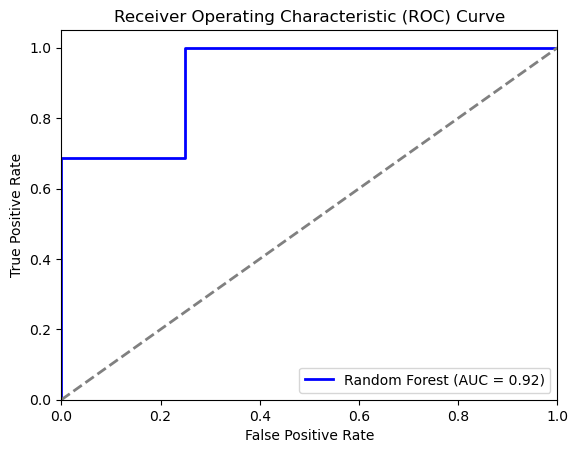

In [239]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test contains 'case' and 'control' labels, convert them to 0 and 1
#y_test_numeric = y_test.replace({'case': 1, 'control': 0})

# Compute ROC curve and ROC area for Random Forest
y_pred_rf_proba = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_numeric, y_pred_rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve for Random Forest
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()